# POSTTEST 3

* Mengimport library dan memanggil 5 data pertama untuk pengetesan.

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_csv('Forbes Top2000 2017.csv')
df.head()

,Unnamed: 0,Rank,Company,Country,Sales,Profits,Assets,Market Value,Sector,Industry
0,NaN,1,ICBC,China,151.4,42.0,3473.2,229.8,Financials,Major Banks
1,NaN,2,China Construction Bank,China,134.2,35.0,3016.6,200.5,Financials,Regional Banks
2,NaN,3,Berkshire Hathaway,United States,222.9,24.1,620.9,409.9,Financials,Investment Services
3,NaN,4,JPMorgan Chase,United States,102.5,24.2,2513.0,306.6,Financials,Major Banks
4,NaN,5,Wells Fargo,United States,97.6,21.9,1943.4,274.4,Financials,Major Banks


* Info Dataset.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    0 non-null      float64
 1    Rank         2000 non-null   int64  
 2   Company       2000 non-null   object 
 3   Country       2000 non-null   object 
 4   Sales         2000 non-null   float64
 5   Profits       2000 non-null   float64
 6   Assets        2000 non-null   float64
 7   Market Value  2000 non-null   float64
 8   Sector        1803 non-null   object 
 9   Industry      1509 non-null   object 
dtypes: float64(5), int64(1), object(4)
memory usage: 156.4+ KB


# PIE CHART

* Kodingan dibawah digunakan untuk menamai ulang sector, sedangkan kolom "id_count" berisi jumlah perusahaan dalam setiap sector.

In [5]:
data_pie = df['Sector'].value_counts().rename('Sector').reset_index(name = 'id_count')
data_pie

,index,id_count
0,Financials,583
1,Consumer Discretionary,237
2,Industrials,209
3,Materials,174
4,Information Technology,130
5,Consumer Staples,115
6,Energy,110
7,Utilities,101
8,Health Care,91
9,Telecommunication Services,53


* Diagram Pie dibawah menunjukkan sector yang memiliki jumlah penjualan tertinggi yang ditampilkan dalam persen. Penjualan tertinggi adalah Financials sedangkan yang terendah adalah Telecommunication Services.

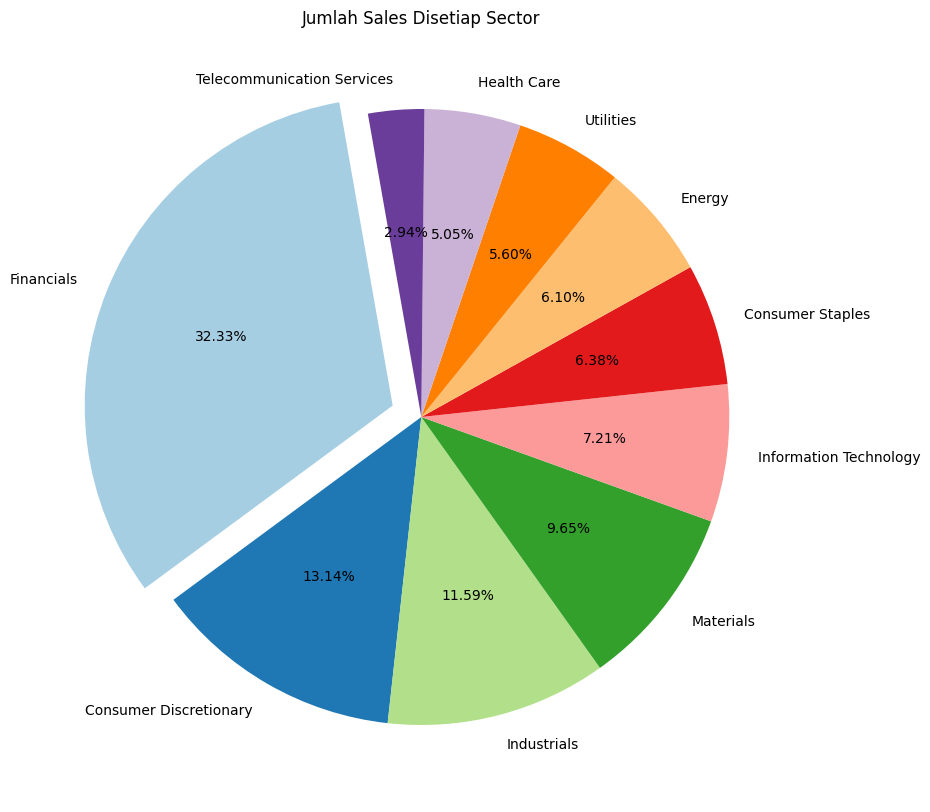

In [6]:
plt.figure(figsize=(10, 10))
plt.pie(data_pie.id_count, 
        labels = data_pie['index'], 
        startangle = 100, 
        autopct ='%.2f%%', 
        explode = (0.1,0,0,0,0,0,0,0,0,0),
        shadow = False,
        colors=sns.color_palette('Paired'))
plt.title('Jumlah Sales Disetiap Sector')
plt.show()

# HEATMAP

* Pada heatmap dibawah, warna-warna yang berbeda digunakan untuk mengindikasikan tingkat korelasi yang berbeda yaitu: warna terang menunjukkan korelasi positif, warna gelap menunjukkan korelasi negatif, dan warna netral menunjukkan korelasi yang lemah atau tidak ada korelasi.

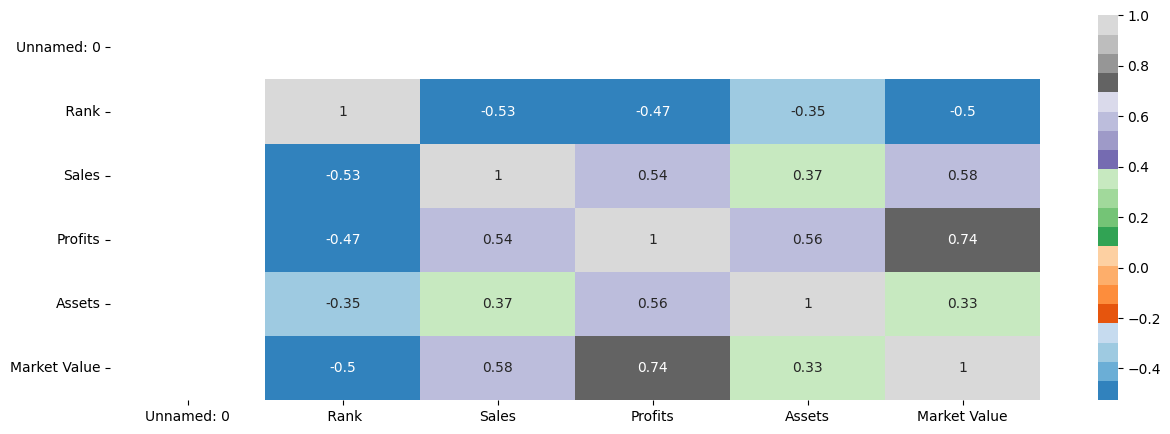

In [7]:
forbes = df.corr(numeric_only=True)
plt.figure(figsize=(15, 5))
sns.heatmap(forbes, annot = True, cmap = "tab20c")
plt.show()

# GRAFIK BATANG

* untuk mengelompokkan dan menghitung jumlah perusahaan dalam setiap sector.

In [8]:
data = df.groupby('Sector').count()
data

,Unnamed: 0,Rank,Company,Country,Sales,Profits,Assets,Market Value,Industry
Sector,,,,,,,,,
Consumer Discretionary,0,237,237,237,237,237,237,237,209
Consumer Staples,0,115,115,115,115,115,115,115,106
Energy,0,110,110,110,110,110,110,110,79
Financials,0,583,583,583,583,583,583,583,474
Health Care,0,91,91,91,91,91,91,91,71
Industrials,0,209,209,209,209,209,209,209,192
Information Technology,0,130,130,130,130,130,130,130,103
Materials,0,174,174,174,174,174,174,174,145
Telecommunication Services,0,53,53,53,53,53,53,53,43


* Terlihat dari grafik batang dibawah bahwa Financial menjadi sector yang paling banyak dipilih oleh negara dan Telecommunication service merupakan sector yang paling rendah untuk dipilih.

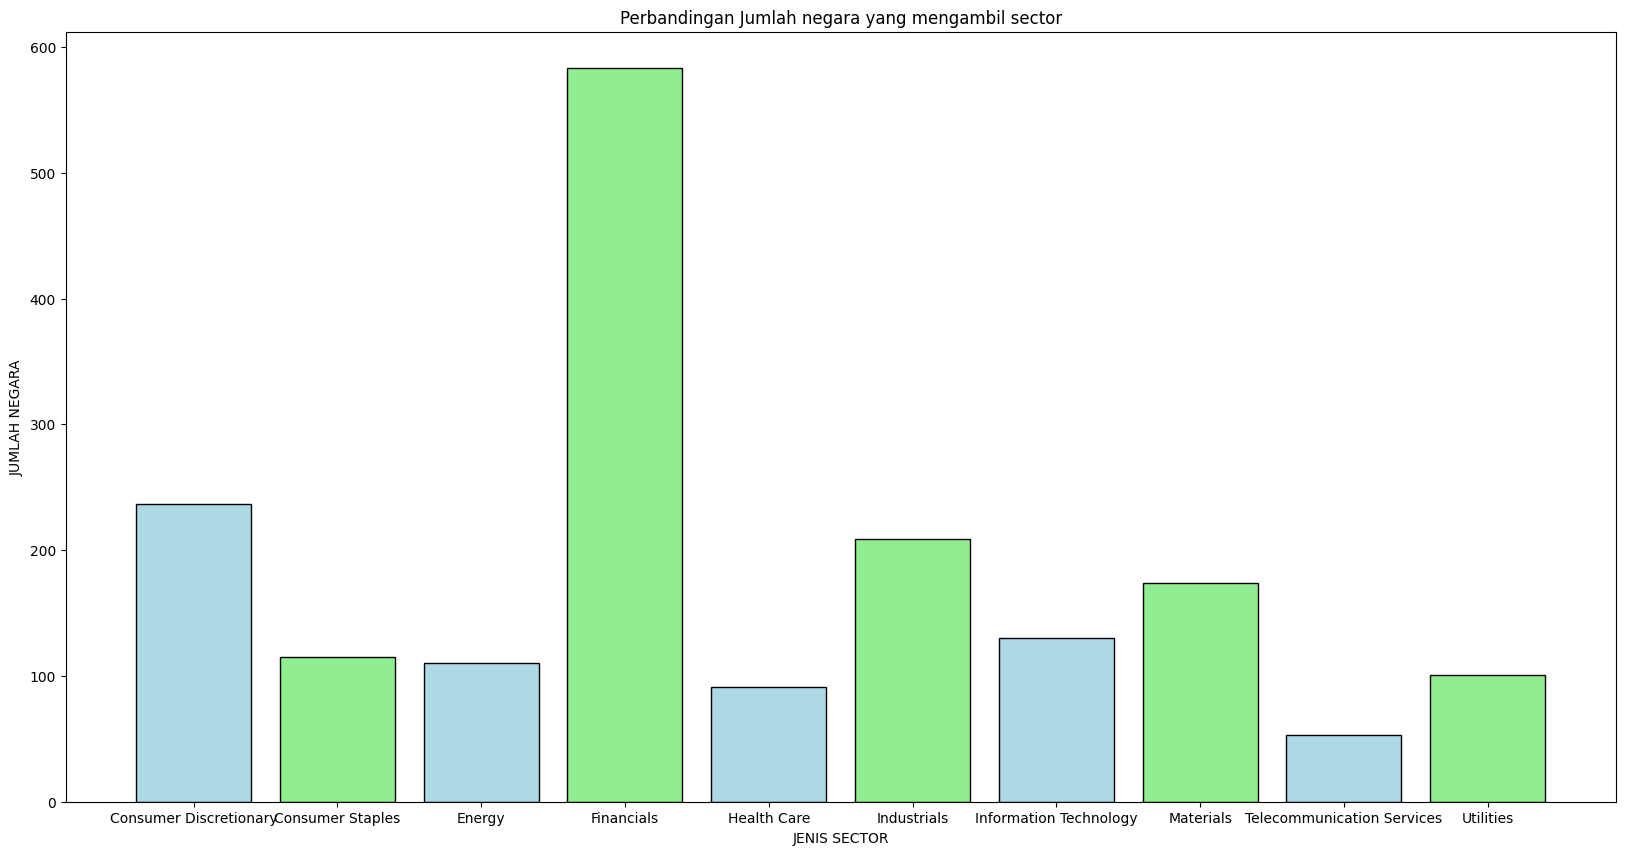

In [9]:
# Menentukan data x dan y
x = data.index
y = data.Country

# Membuat diagram batang dengan warna yang berbeda
plt.figure(figsize=(20, 10))
plt.bar(x, y, color = ['lightblue', 'lightgreen'], edgecolor = 'Black')

# Menambahkan label dan judul
plt.title('Perbandingan Jumlah negara yang mengambil sector')
plt.xlabel('JENIS SECTOR')
plt.ylabel('JUMLAH NEGARA')

# Menampilkan diagram
plt.show()

# SCATTER PLOT

* Scatter plot dibawah ini memvisualisasikan hubungan antara keuntungan (Profits) dan penjualan (Sales). Setiap titik dalam plot mewakili satu perusahaan di sektor 'Financials'




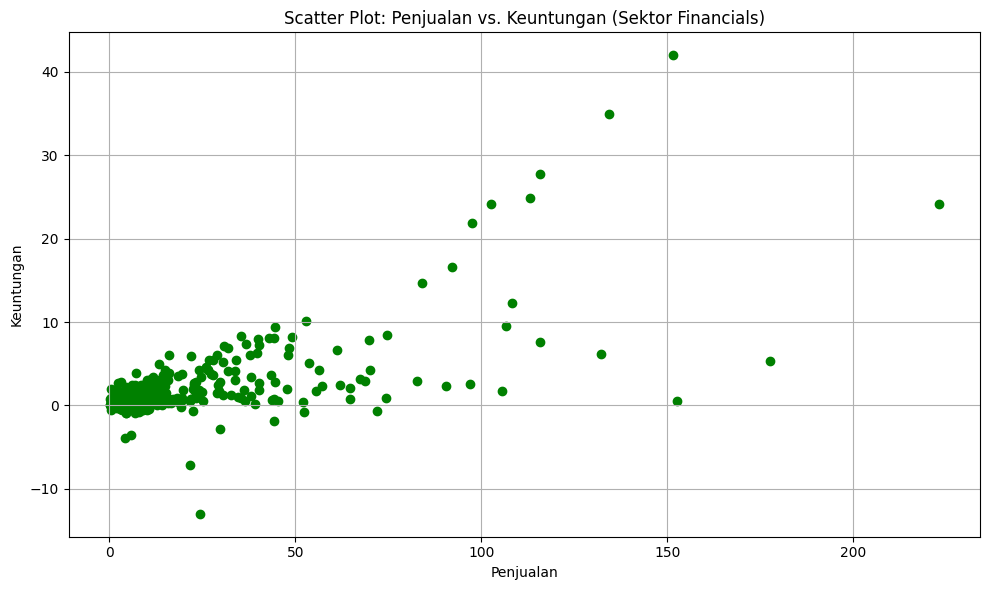

In [15]:
# Mengambil data untuk sektor 'Financials'
forbes = df[df['Sector'] == 'Financials']

plt.figure(figsize=(10, 6))  # Mengatur ukuran gambar
plt.scatter(forbes['Sales'], forbes['Profits'], c='green', label='Financials')

# Mengatur label plot dan judul
plt.title('Scatter Plot: Penjualan vs. Keuntungan (Sektor Financials)')  # Ubah judul
plt.xlabel('Penjualan')
plt.ylabel('Keuntungan')

# Menampilkan grafik
plt.grid(True)  # Menambahkan grid
plt.tight_layout()  # Mengatur tata letak
plt.show()


# HISTOGRAM

* Hasil dari histogram dibawah menunjukkan sebagian besar perusahaan dalam dataset memiliki jumlah aset yang relatif rendah, dengan frekuensi kemunculan yang semakin menurun seiring dengan peningkatan jumlah aset.

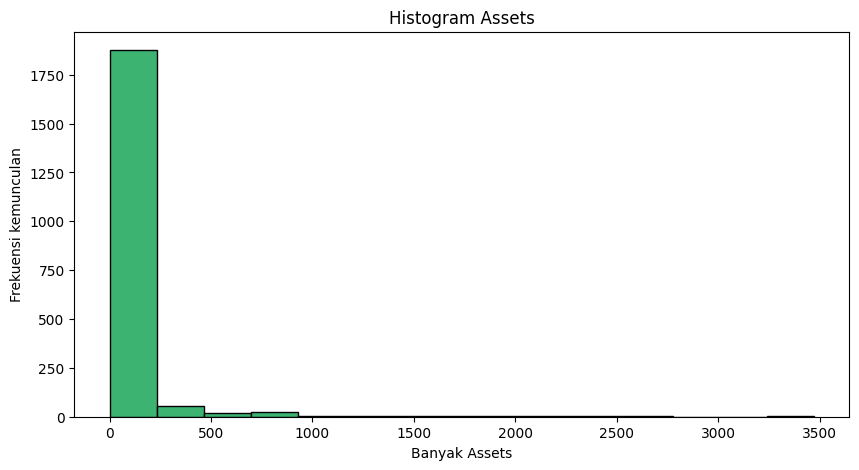

In [16]:
plt.figure(figsize=(10,5))
plt.hist(df['Assets'], bins=15, color='mediumseagreen', edgecolor = 'Black')
plt.title('Histogram Assets')
plt.ylabel('Frekuensi kemunculan')
plt.xlabel('Banyak Assets')
plt.show()

# BOX PLOT

* Boxplot dibawah memberikan gambaran visual tentang sebaran dan distribusi data nilai pasar perusahaan. Boxplot tersebut menunjukkan statistik dasar seperti nilai median (garis tengah dalam kotak), kuartil pertama dan ketiga (batas kotak), serta rentang interkuartil (panjang kotak).

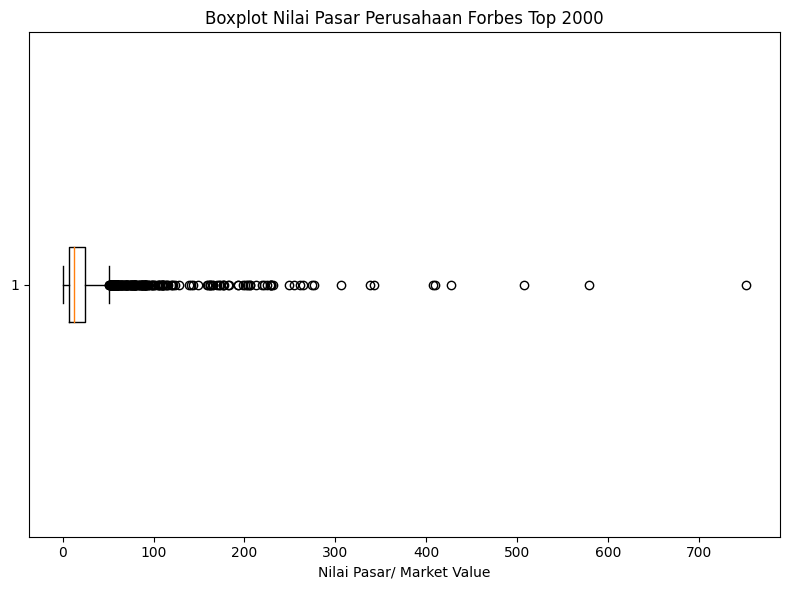

In [17]:
# Memilih kolom 'Market Value' untuk boxplot
forbes = df['Market Value']

plt.figure(figsize=(8, 6))  # Mengatur ukuran gambar
plt.boxplot(forbes, vert=False)  # vert=False untuk membuat boxplot horizontal
plt.title('Boxplot Nilai Pasar Perusahaan Forbes Top 2000')
plt.xlabel('Nilai Pasar/ Market Value')

# Menampilkan grafik
plt.tight_layout()
plt.show()